# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Checking single City

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1674077946,
    "id": 2643743,
    "main": {
        "feels_like": -2.8,
        "humidity": 88,
        "pressure": 1003,
        "temp": 1.27,
        "temp_max": 2.86,
        "temp_min": -1.08
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1674028620,
        "sunset": 1674059049,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 4.12
    }
}


In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mattawa
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | epe
Processing Record 4 of Set 1 | vyshneve
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | lithakia
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | maldonado
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | ovalle
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | t

Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | babanusah
City not found. Skipping...
Processing Record 38 of Set 4 | carutapera
Processing Record 39 of Set 4 | skibbereen
Processing Record 40 of Set 4 | cuamba
Processing Record 41 of Set 4 | soe
Processing Record 42 of Set 4 | gualaquiza
Processing Record 43 of Set 4 | trofors
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | berea
Processing Record 47 of Set 4 | qasigiannguit
Processing Record 48 of Set 4 | shemursha
Processing Record 49 of Set 4 | tazovskiy
Processing Record 0 of Set 5 | asau
Processing Record 1 of Set 5 | constantine
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | masuda
Processing Record 4 of Set 5 | noumea
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | aklavik
Processing Record 9

Processing Record 26 of Set 8 | ponta delgada
Processing Record 27 of Set 8 | edson
Processing Record 28 of Set 8 | vung tau
Processing Record 29 of Set 8 | uzhur-4
City not found. Skipping...
Processing Record 30 of Set 8 | isangel
Processing Record 31 of Set 8 | kegayli
City not found. Skipping...
Processing Record 32 of Set 8 | soldatskiy
City not found. Skipping...
Processing Record 33 of Set 8 | olenegorsk
Processing Record 34 of Set 8 | qeshm
Processing Record 35 of Set 8 | nyuksenitsa
Processing Record 36 of Set 8 | haines junction
Processing Record 37 of Set 8 | mayskiy
Processing Record 38 of Set 8 | rennes
Processing Record 39 of Set 8 | awjilah
Processing Record 40 of Set 8 | cabanas
Processing Record 41 of Set 8 | axim
Processing Record 42 of Set 8 | lakes entrance
Processing Record 43 of Set 8 | tilichiki
Processing Record 44 of Set 8 | moron
Processing Record 45 of Set 8 | sinnar
Processing Record 46 of Set 8 | sumbe
Processing Record 47 of Set 8 | mrirt
City not found. S

Processing Record 14 of Set 12 | dunedin
Processing Record 15 of Set 12 | pryazha
Processing Record 16 of Set 12 | sudogda
Processing Record 17 of Set 12 | waingapu
Processing Record 18 of Set 12 | sept-iles
Processing Record 19 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 20 of Set 12 | koksovyy
Processing Record 21 of Set 12 | pasighat
Processing Record 22 of Set 12 | atbasar
Processing Record 23 of Set 12 | shemgang
Processing Record 24 of Set 12 | port huron
Processing Record 25 of Set 12 | matagami
Processing Record 26 of Set 12 | ucluelet
Processing Record 27 of Set 12 | ola
Processing Record 28 of Set 12 | kamsack
Processing Record 29 of Set 12 | caceres
Processing Record 30 of Set 12 | areosa
Processing Record 31 of Set 12 | aloleng
Processing Record 32 of Set 12 | quang ngai
Processing Record 33 of Set 12 | los zacatones
Processing Record 34 of Set 12 | khuzdar
Processing Record 35 of Set 12 | vokhma
Processing Record 36 of Set 12 | bam
Processing Record 3

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mattawa,46.7379,-119.9028,5.01,79,100,1.41,US,1674078355
1,mar del plata,-38.0023,-57.5575,24.01,89,75,10.29,AR,1674078356
2,epe,6.5841,3.9834,24.52,89,43,2.06,NG,1674078356
3,vyshneve,50.3891,30.3705,7.87,88,28,4.47,UA,1674078357
4,nikolskoye,59.7035,30.7861,0.94,98,100,4.13,RU,1674078357


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mattawa,46.7379,-119.9028,5.01,79,100,1.41,US,1674078355
1,mar del plata,-38.0023,-57.5575,24.01,89,75,10.29,AR,1674078356
2,epe,6.5841,3.9834,24.52,89,43,2.06,NG,1674078356
3,vyshneve,50.3891,30.3705,7.87,88,28,4.47,UA,1674078357
4,nikolskoye,59.7035,30.7861,0.94,98,100,4.13,RU,1674078357


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

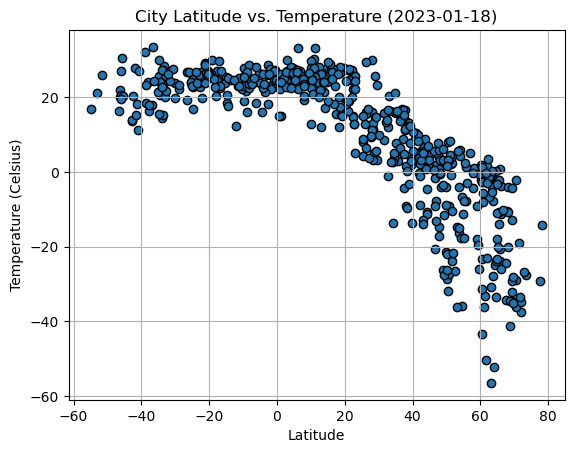

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

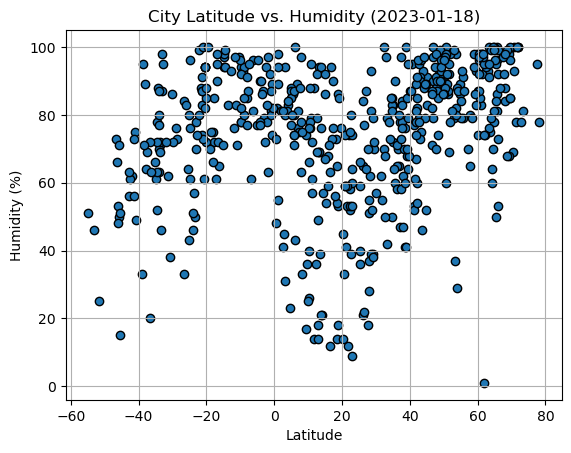

In [10]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

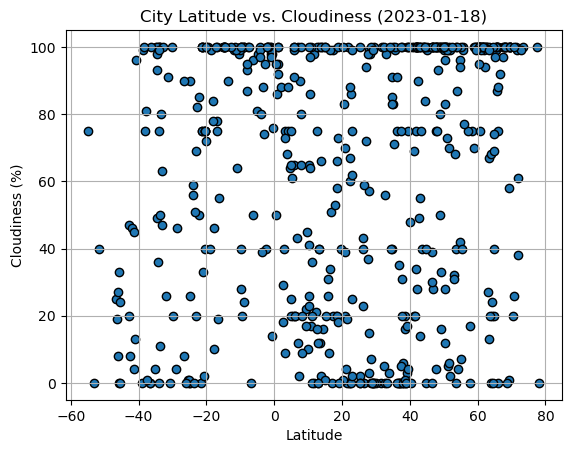

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

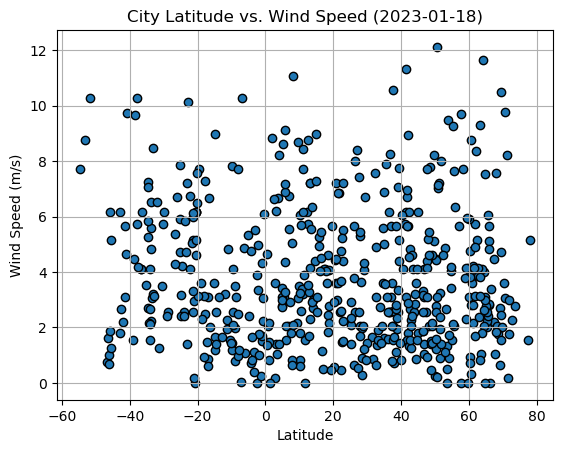

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(title)
    plt.xlabel("Latitude")
    plt.annotate(line_eq,(text_coordinates),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mattawa,46.7379,-119.9028,5.01,79,100,1.41,US,1674078355
2,epe,6.5841,3.9834,24.52,89,43,2.06,NG,1674078356
3,vyshneve,50.3891,30.3705,7.87,88,28,4.47,UA,1674078357
4,nikolskoye,59.7035,30.7861,0.94,98,100,4.13,RU,1674078357
5,clyde river,70.4692,-68.5914,-28.87,69,20,3.60,CA,1674078358


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,24.01,89,75,10.29,AR,1674078356
6,rikitea,-23.1203,-134.9692,25.50,70,69,1.41,PF,1674078359
7,geraldton,-28.7667,114.6000,22.23,73,46,2.57,AU,1674078116
9,maldonado,-34.6667,-54.9167,25.66,52,93,7.23,UY,1674078360
10,avarua,-21.2078,-159.7750,26.03,83,75,5.14,CK,1674078361


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161839712602381
y = -0.76x +33.05


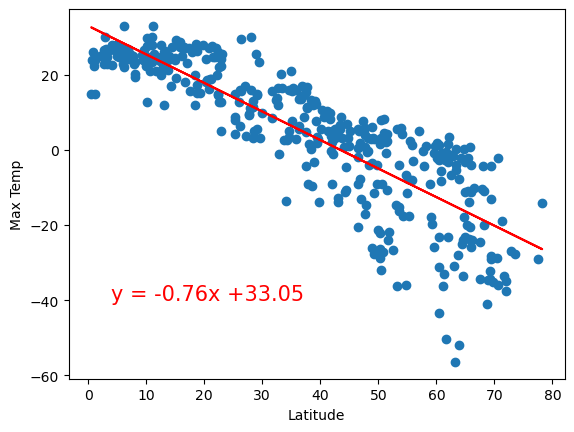

In [24]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp", (4,-40))

The r-value is: 0.05509015511691746
y = 0.07x +25.02


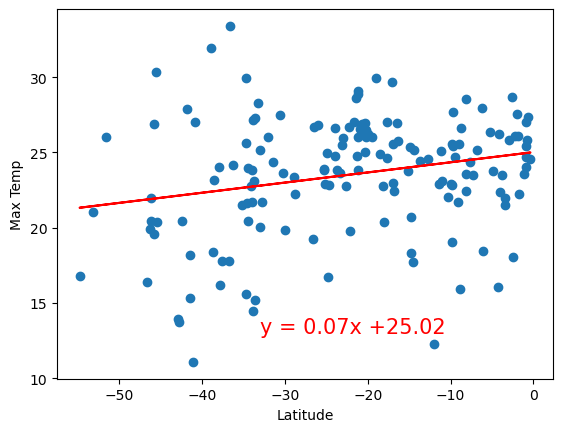

In [25]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp", (-33, 13))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between the Max Temp and Latitude for the Northern Hemisphere is a strong negative correlation. The temperature decreases as the latitude increase. 

The linear relationship between the Max Temp and Latitude for the Southern Hemisphere is a weak positive correlation. The temperature increases slightly as the latitude increase. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18339087562619233
y = 0.44x +58.01


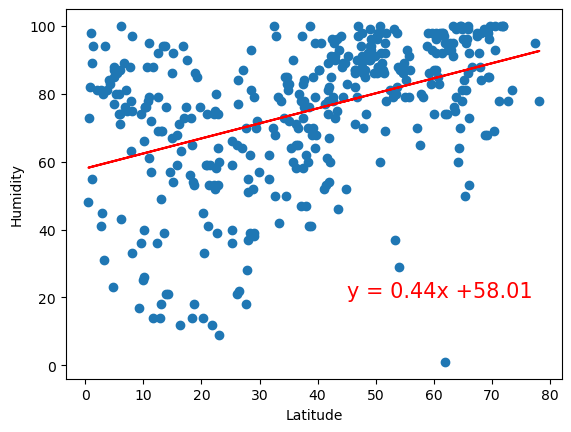

In [26]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity", (45, 20))

The r-value is: 0.30880180939548096
y = 0.69x +90.96


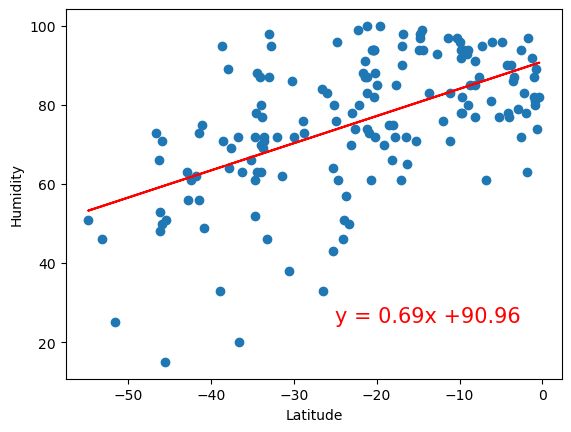

In [27]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity", (-25, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between the Humidity and Latitude for the Northern Hemisphere shows a weak positive correlation.

The linear relationship between the Humidity and Latitude for the Southern Hemisphere shows a weak, but near moderate positive correlation. The temperature increases slightly as the latitude increase. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06786808131728259
y = 0.5x +42.56


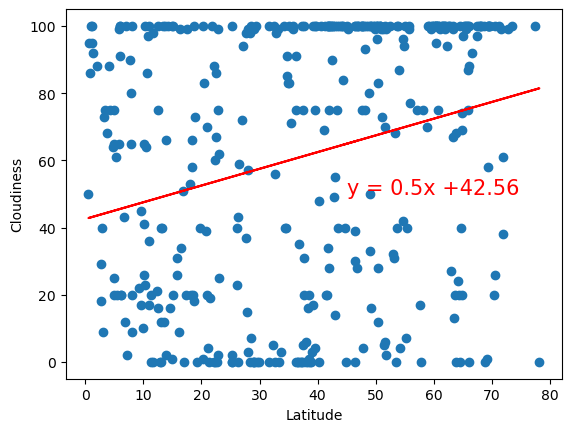

In [28]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness", (45, 50))

The r-value is: 0.197211607298037
y = 1.2x +90.31


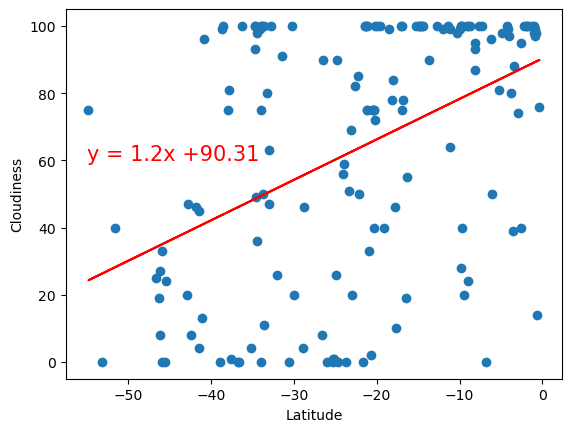

In [29]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between the Cloudiness and Latitude for both the Northern Hemisphere and Southern Hemisphere are weak positive correlations. The temperature increases slightly as the latitude increase. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0014234175160738373
y = -0.0x +3.86


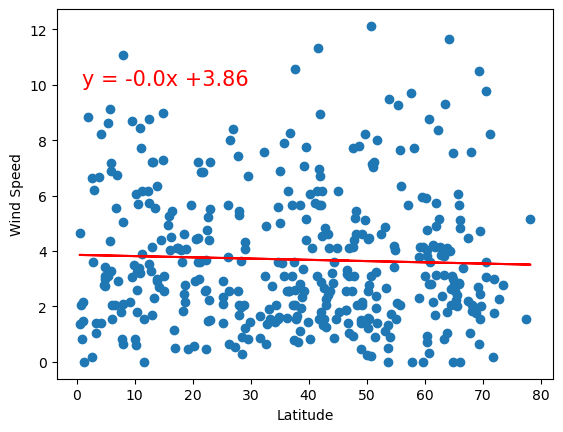

In [30]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed", (1, 10))

The r-value is: 0.08551566664285838
y = -0.05x +2.69


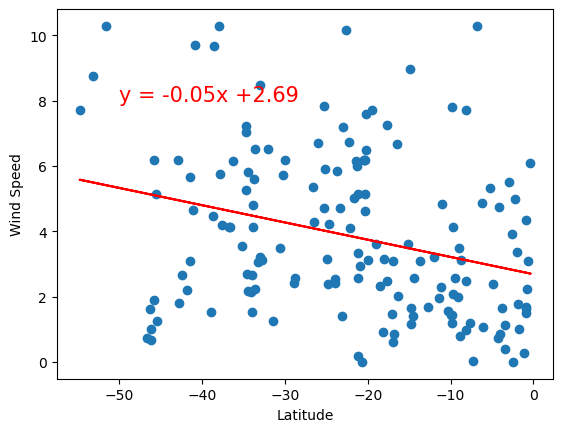

In [31]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between the Wind Speed and Latitude for both the Northern Hemisphere and Southern Hemisphere shows no correlations.